# **Project 34: Plant Disease Predictor**

***Matplotlib*** : *A versatile plotting library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *A statistical data visualization library built on Matplotlib that provides a high-level interface for drawing attractive and informative graphs.*

***pandas*** : *A powerful data manipulation and analysis library for Python, offering data structures like DataFrames for handling structured data.*

***numpy*** : *A fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices along with a collection of mathematical functions.*

***warnings*** : *A Python module that provides a way to issue and control warning messages during code execution, often used to alert developers to potential issues.*

**We are importing these modules for Data Loading, Image Preprocessing and Visualization.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

**warnings.simplefilter("ignore"): Suppresses all warning messages in Python, preventing them from being displayed during code execution.**

In [2]:
warnings.simplefilter("ignore")

**drive.mount("/content/drive"): Mounts Google Drive to your Colab environment, allowing you to access and interact with your Drive files directly from the /content/drive directory in Google Colab.**

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**!pip install unrar: Installs the unrar package to enable extraction of .rar files using Python.**

In [4]:
!pip install unrar

**Extracts the contents of the specified .rar file to the current directory.**

In [5]:
!unrar x "/content/drive/MyDrive/Plant Image Dataset.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Plant Image Dataset.rar


Would you like to replace the existing file Plant Image Dataset/Corn Common Rust/dfce64d1-9954-4922-8beb-2681e2e6b896___GCREC_Bact.Sp 2961.JPG
 13776 bytes, modified on 2019-10-27 18:19
with a new one
 13776 bytes, modified on 2019-10-27 18:19

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


**Displays 16 randomly selected images from the specified directory in a 4x4 grid, with each image's dimensions labeled on the x and y axes.**

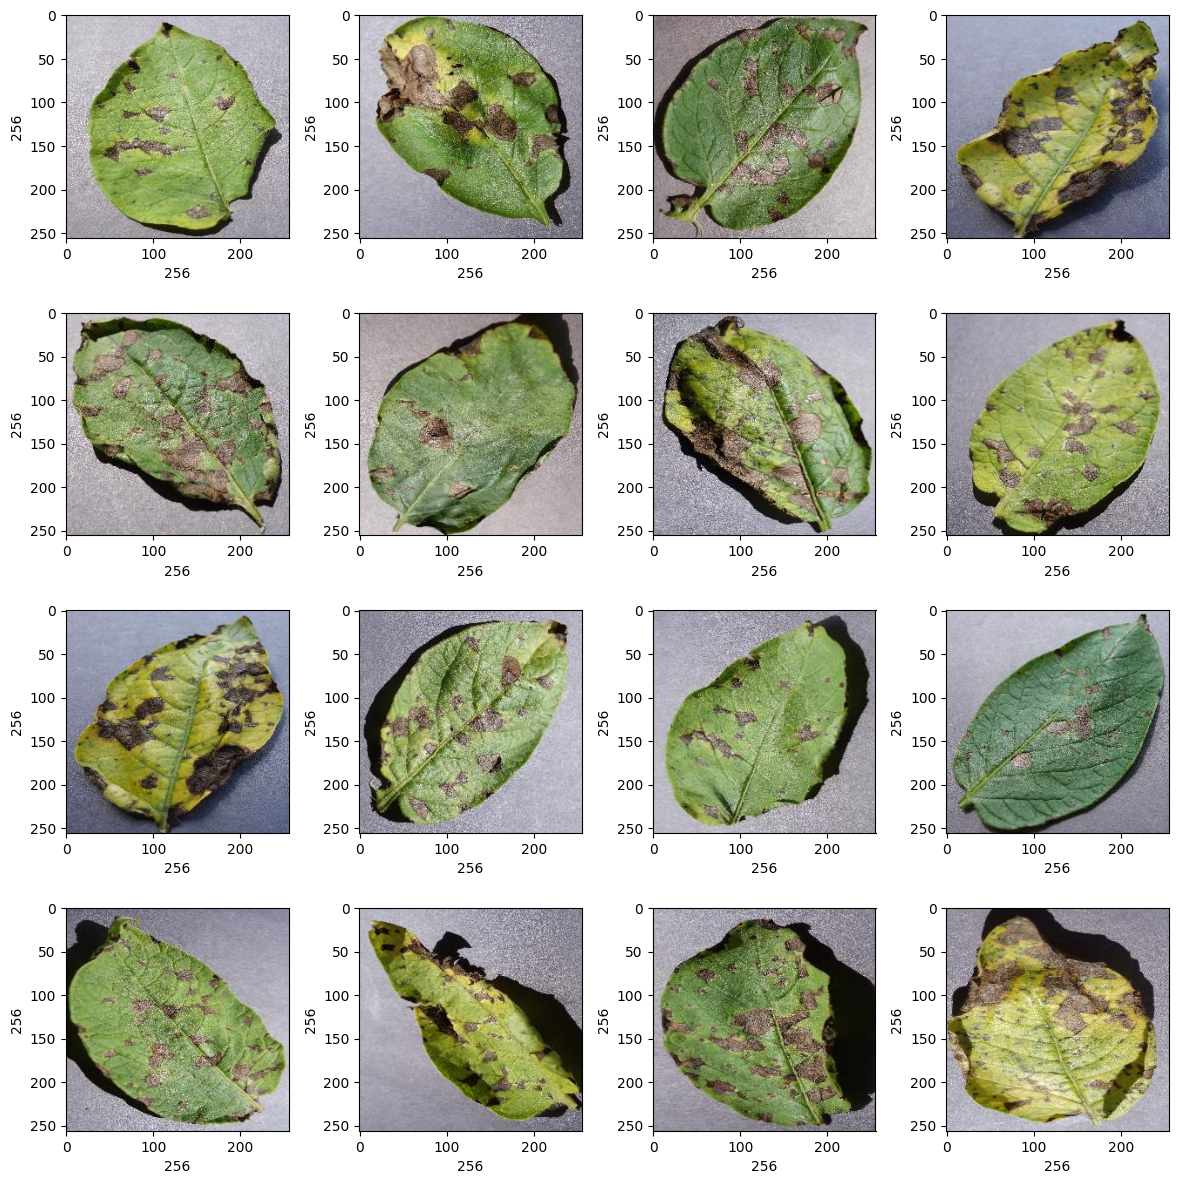

In [6]:
import random
import os
from matplotlib.image import imread

plt.figure(figsize=(12, 12))
path = "/content/Plant Image Dataset/Potato Early Blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path + "/" + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

**Reads and resizes an image to 256x256 pixels using OpenCV, then converts it to a NumPy array using Keras, or returns an empty array if the image is not found.**

In [7]:
import cv2
from keras.preprocessing.image import img_to_array, array_to_img


def convert_image_to_array(image_dir):
    image = cv2.imread(image_dir)

    if image is not None:
        image = cv2.resize(image, (256, 256))

        return img_to_array(image)

    else:
      return np.array([])

**Initializes directories, lists for storing image paths and labels, and mappings for image categories to binary labels, with a temporary variable set to -1.**

In [8]:
dir = "/content/Plant Image Dataset"
root_dir = os.listdir(dir)
image_list, label_list = [], []
all_labels = ["Corn Common Rust", "Potato Early Blight", "Tomato Bacterial Spot"]
binary_labels = [0, 1, 2]
temp = -1

**Iterates through each directory and file in the specified directory, converting images to arrays and appending them to image_list, while also adding corresponding binary labels to label_list.**

In [9]:
for directory in root_dir:
    plant_image_list = os.listdir(f"{dir}/{directory}")
    temp += 1

    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

**Counts the occurrences of each label in label_list and displays the result as a DataFrame.**

In [10]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
0,300
1,300
2,300


**image_list[0].shape: Retrieves the dimensions of the first image in image_list, showing its height, width, and number of color channels.**

In [11]:
image_list[0].shape

(256, 256, 3)

**label_list.shape: Displays the shape of the label_list array, showing the number of labels it contains.**

In [12]:
label_list = np.array(label_list)
label_list.shape

(900,)

**from sklearn.model_selection import train_test_split: Imports the train_test_split function from scikit-learn for splitting data into training and testing sets.**

In [13]:
from sklearn.model_selection import train_test_split

**X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, train_size=0.80): Splits image_list and label_list into training and testing sets, with 80% of the data used for training and 20% for testing.**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, train_size = 0.80)

**Normalizes X_train and X_test by converting them to float16 and scaling pixel values to the range [0, 1], then reshapes them to have dimensions (number of samples, 256, 256, 3).**

In [15]:
X_train = np.array(X_train, dtype = np.float16) / 255.0
X_test = np.array(X_test, dtype = np.float16) / 255.0
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

**y_train = to_categorical(y_train) and y_test = to_categorical(y_test): Converts the integer labels in y_train and y_test into one-hot encoded vectors for use in classification models.**

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Imports necessary components to build and define a Convolutional Neural Network (CNN) using Keras, including the model type, layers for convolution, pooling, activation, and dropout.**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2

**This is a Convolutional Neural Network with three convolutional blocks for image feature extraction.**

**Each block doubles filters from 16 to 32 to 64 to capture increasing feature complexity hierarchically.**

**The network uses max pooling after each convolution to reduce spatial dimensions and control parameters.**

**Final dense layers with dropout perform classification into three disease categories with overfitting prevention.**

In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,147 (16.09 MB)

 Trainable params: 4,218,147 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

**Compiles the CNN model using categorical crossentropy loss, the "adam" optimizer, and accuracy as the evaluation metric.**

In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

**Splits X_train and y_train into training and validation sets, using 80% of the data for training and 20% for validation.**

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.80)

**Trains the CNN model on X_train and y_train for 50 epochs with a batch size of 128, while validating the model on X_val and y_val.**

In [21]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 11s/step - accuracy: 0.4083 - loss: 1.1367 - val_accuracy: 0.4861 - val_loss: 0.8306
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - accuracy: 0.7456 - loss: 0.5916 - val_accuracy: 0.8889 - val_loss: 0.2496
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 14s/step - accuracy: 0.9281 - loss: 0.1912 - val_accuracy: 0.9583 - val_loss: 0.1188
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 9s/step - accuracy: 0.9766 - loss: 0.0743 - val_accuracy: 0.9653 - val_loss: 0.0942
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 9s/step - accuracy: 0.9862 - loss: 0.0496 - val_accuracy: 0.9722 - val_loss: 0.0781
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.9945 - loss: 0.0184 - val_accuracy: 0.9861 - val_loss: 0.0728
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.9778 - loss: 0.0521 - val_accuracy: 0.9861 - val_loss: 0.0641
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9722 - val_loss: 0.0716
Epoch

**Saves the trained CNN model to a file named "Finalized-Model.h5".**

In [22]:
model.save('Finalized-Model.h5')

**Plots the training and validation accuracy of the model over epochs, with the training accuracy shown in red and validation accuracy in blue.**

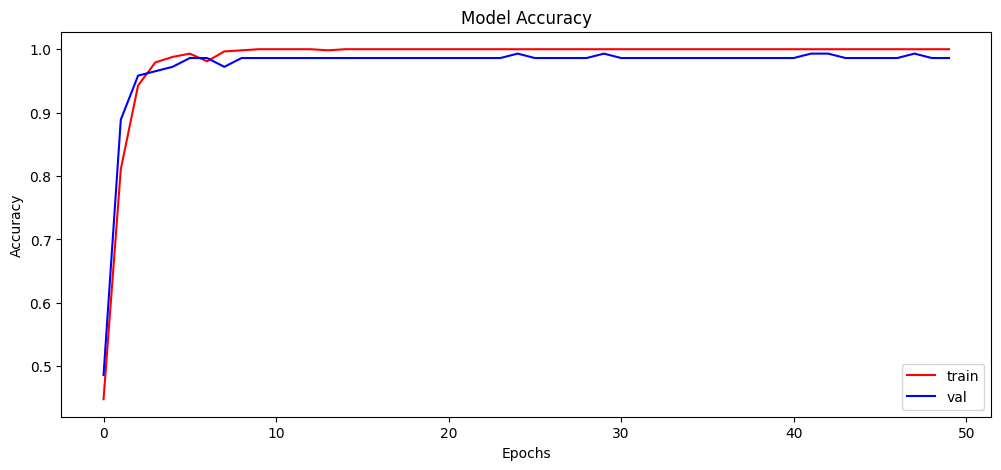

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(history.history["accuracy"], color = "r")
plt.plot(history.history["val_accuracy"], color = "b")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.show()

**Evaluates the trained model on X_test and y_test, and prints the test accuracy as a percentage.**

In [24]:
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy:  {score[1] * 100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 1.0000 - loss: 8.6575e-04
Test Accuracy:  100.0


**Generates predictions for X_test using the trained model and stores them in y_pred.**

In [25]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


**Converts the second image in X_test from a NumPy array back to a PIL image and displays it.**

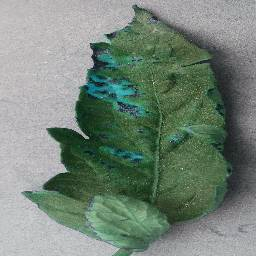

In [26]:
img = array_to_img(X_test[0])
img

**Prints the original label and the predicted label for the second sample in y_test and y_pred, respectively, using the all_labels list for mapping.**

In [27]:
print("Originally : ", all_labels[np.argmax(y_test[0])])
print("Predicted : ", all_labels[np.argmax(y_pred[0])])

Originally :  Potato Early Blight
Predicted :  Potato Early Blight
